# Dimensionality Reduction

Used for:
- **Visualization**: Projecting high-dimensional data into 2D or 3D.
- **Noise Reduction**: Eliminating irrelevant features.
- **Computational Efficiency**: Speeding up algorithms.

## Principal Component Analysis (PCA)
Linearly transforms data onto a new coordinate system such that the directions (principal components) capturing the largest variation in the data can be easily identified.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors, kneighbors_graph
from sklearn.decomposition import PCA

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.colors as mcolors
colors = list(mcolors.TABLEAU_COLORS.keys())

rng = np.random.default_rng(seed=42)

mean = [80, 175] # 80 kg (180 lb), 175 cm (5 ft 9 in) 
cov = [[1, .8], [.8, 1]]
data = rng.multivariate_normal(mean=mean, cov=cov, size=1000)
means = np.mean(data, axis=0)
data_centered = data - means

plt.scatter(data[:,0], data[:,1], alpha=0.5)
plt.title('Height & Weight Scatterplot')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')

ModuleNotFoundError: No module named 'seaborn'

In [69]:
# Calculate the sample covariance matrix
sample_cov = np.cov(data_centered, rowvar=False) 
eigenvalues, eigenvectors = np.linalg.eigh(sample_cov)

# Sort the eigenvalues and eigenvectors in descending order
sorted_idx = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_idx]
sorted_eigenvectors = eigenvectors[:, sorted_idx]

print("Manual Eigenvalues:", sorted_eigenvalues)
print("Manual Eigenvectors:\n", sorted_eigenvectors, "\n")

pca = PCA(n_components=2)
pca.fit(data)
print("scikit-learn PCA Explained Variance:", pca.explained_variance_)
print("scikit-learn PCA Components:\n", pca.components_)

Manual Eigenvalues: [1.76964131 0.2044461 ]
Manual Eigenvectors:
 [[-0.7224084   0.69146664]
 [-0.69146664 -0.7224084 ]] 

scikit-learn PCA Explained Variance: [1.76964131 0.2044461 ]
scikit-learn PCA Components:
 [[ 0.7224084   0.69146664]
 [-0.69146664  0.7224084 ]]


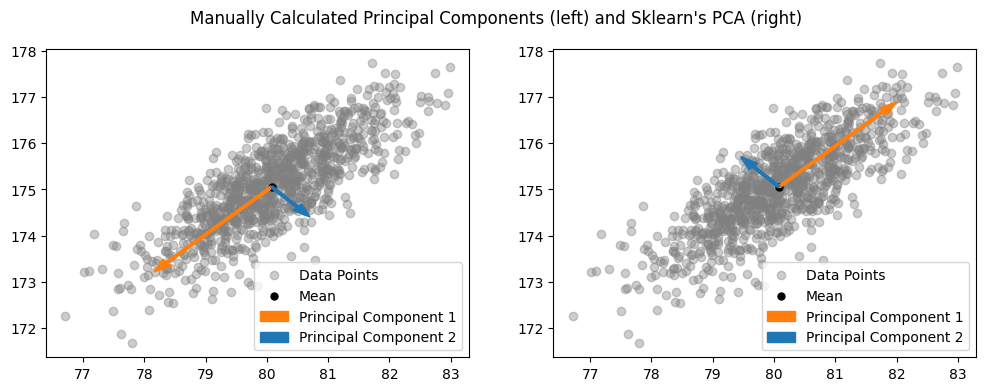

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

def plot_PCA(ax, eigenvectors, eigenvalues):
    ax.scatter(data[:, 0], data[:, 1], alpha=0.4, label='Data Points', color='grey')
    ax.scatter(means[0], means[1], color='black', marker='o', s=25, label='Mean')

    # Plot the eigenvectors
    for i in range(len(eigenvalues)):
        eigenvector = eigenvectors[:, i]
        eigenvalue = eigenvalues[i]
        # Scale the eigenvectors by the square root of eigenvalues for better visualization
        scale = np.sqrt(eigenvalue) * 2
        ax.arrow(means[0], means[1],
                eigenvector[0] * scale, eigenvector[1] * scale,
                color='tab:orange' if i == 0 else 'tab:blue',
                width=0.05, head_width=0.2, length_includes_head=True,
                label=f'Principal Component {i+1}' if i == 0 else f'Principal Component {i+1}')

    # ax.set_title('Data with Principal Components')
    ax.legend()

fig.suptitle("Manually Calculated Principal Components (left) and Sklearn's PCA (right)")
plot_PCA(axes[0], sorted_eigenvectors, sorted_eigenvalues)
plot_PCA(axes[1], pca.components_.T, pca.explained_variance_)

Text(0, 0.5, 'Principal Component 2')

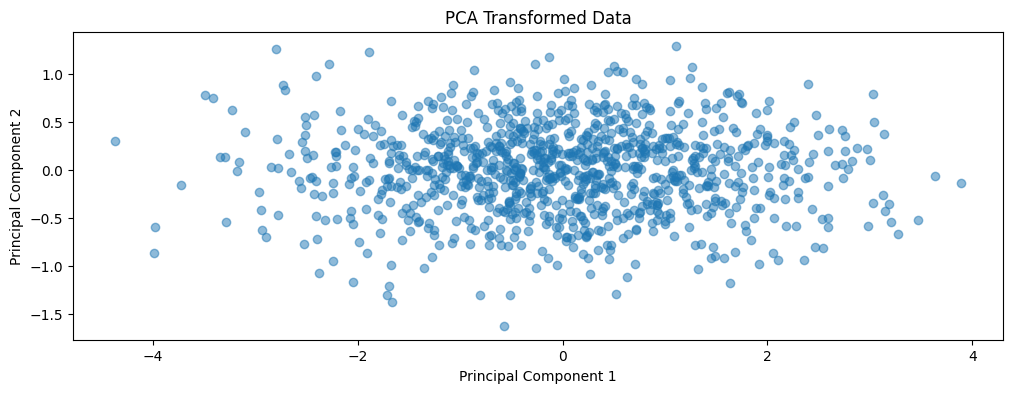

In [78]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

plt.scatter(pca_data[:,0], pca_data[:,1], alpha=0.5)
plt.title('PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#### Singular Value Decomposition (SVD)
$$ X = U \Sigma V^T $$
- $U \ \ \ (n×p)$: matrix whose columns are the left singular vectors.
- $\Sigma \ \ \ (p×p)$: diagonal matrix with singular values.
- $V^T \ (p×p)$:  matrix whose rows are the right singular vectors (principal components)


scikit-learn's `PCA` class uses Singular Value Decomposition to find the principal components.

In [71]:
U, S, Vt = np.linalg.svd(data_centered, full_matrices=False)

n_samples = data.shape[0]
eigenvalues_svd = (S ** 2) / (n_samples - 1)
explained_variance_ratio_svd = eigenvalues_svd / np.sum(eigenvalues_svd)
principal_components_svd = Vt.T  # Each column is a principal component

print("SVD-Based PCA Explained Variance:", eigenvalues_svd)
print("SVD-Based PCA Explained Variance Ratio:", explained_variance_ratio_svd)
print("SVD-Based PCA Principal Components:\n", principal_components_svd)

SVD-Based PCA Explained Variance: [1.76964131 0.2044461 ]
SVD-Based PCA Explained Variance Ratio: [0.89643513 0.10356487]
SVD-Based PCA Principal Components:
 [[ 0.7224084   0.69146664]
 [ 0.69146664 -0.7224084 ]]


## Time Series Example
In this example, we have a time series with 30 different features. There are three distinct patterns in the features that we want to identify.

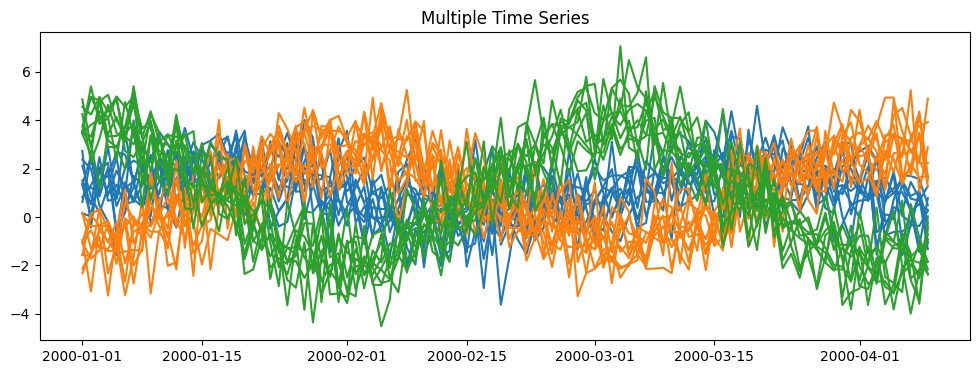

In [59]:
plt.rcParams['figure.figsize'] = (12, 4)
rng = np.random.default_rng(42)

x = np.linspace(0, 10, 100)
date_index = pd.date_range(start='2000-01-01', periods=len(x), freq='D')
data = {}
noise = 1.0
for i in range(30):
    if i < 10:
        data[f'x{i}'] = np.sin(x) + rng.normal(1, noise, len(x))
    elif i >= 10 and i < 20:
        data[f'x{i}'] = -np.cos(x)*2 + rng.normal(1, noise, len(x))
    elif i >= 20:
        data[f'x{i}'] = np.cos(x)*3 + rng.normal(1, noise, len(x))
    plt.plot(date_index, data[f'x{i}'], c=colors[i//10])

df = pd.DataFrame(data, index=date_index)
plt.title('Multiple Time Series')
plt.show()

In [67]:
print(f"df.T.shape: {df.T.shape}")
display(df.T.head())

df.T.shape: (30, 100)


,2000-01-01,2000-01-02,2000-01-03,2000-01-04,2000-01-05,2000-01-06,2000-01-07,2000-01-08,2000-01-09,2000-01-10,...,2000-03-31,2000-04-01,2000-04-02,2000-04-03,2000-04-04,2000-04-05,2000-04-06,2000-04-07,2000-04-08,2000-04-09
x0,1.304717,0.060854,1.951100,2.238979,-0.557899,0.181672,1.697475,1.333367,1.706161,0.935902,...,1.993086,1.132275,0.708169,0.951115,-0.757448,-0.617459,-0.591543,-0.361846,0.943137,-0.449500
x1,0.621837,2.400067,0.844385,2.035929,0.459519,1.278414,0.619612,1.310576,2.563271,0.061625,...,3.051366,1.051241,0.748280,2.492278,-0.177160,-0.065074,1.374484,0.240796,0.538241,0.292536
x2,1.337575,2.508320,1.291234,1.942353,-0.657035,1.435133,0.726404,0.430796,0.844810,1.454822,...,1.075723,1.383323,2.602959,-1.535825,0.693036,1.006166,1.027151,0.263487,-1.213359,0.783974
x3,2.727350,-0.433023,2.064477,0.969889,1.331812,0.430953,1.235178,2.949654,2.305618,3.521257,...,-0.982403,1.285114,0.659691,1.490219,1.631840,0.967895,1.491290,0.864613,1.073427,-0.248694
x4,0.820389,1.297615,2.021177,0.904673,1.914304,1.218013,1.452092,2.479129,-0.270098,0.492473,...,2.412988,1.597291,0.845218,1.484799,0.621213,1.765200,-1.100249,0.299794,-1.447449,-1.039082


## Manifold Learning Techniques
Manifold learning is a type of unsupervised machine learning technique used primarily for dimensionality reduction. It assumes that high-dimensional data lies on or near a lower-dimensional manifold embedded within the higher-dimensional space. 

Unlike PCA/SVD, these methods can capture non-linear relationships.

### Isomap 

Steps:
1. Construct a nearest-neighbor graph.
2. Compute geodesic distances between all pairs of points.
3. Apply MDS to embed the data into a lower-dimensional space.

### Locally Linear Embedding (LLE)
Key assumption in LLE is that each data point can be approximated as a linear combination of its neighbors.

Steps:
1. Construct a nearest-neighbor graph.
2. Find weights that linearly reconstruct the data point using its neighbors.
3. Solve the eigenvalue problem involving a sparse matrix derived from the weight matrix.
4. Use the eigenvectors to map the original data to a lower-dimensional space.

### t-Distributed Stochastic Neighbor Embedding (t-SNE)
Primarily used for visualization. It preserves local structures in high-dimensional data.

Notes:
- Computationally intensive.
- Random initialization so results can vary.
- `Perplexity`: Key parameter (usually between 5 and 50); try several values.

### Uniform Manifold Approximation and Projection (UMAP)
Emphasizes both local and global data structure.

Faster than t-SNE on large datasets.

c:\USERS\JBARKER\ONEDRIVE - GENERAC POWER SYSTEMS, INC\DOCUMENTS\CODE\TORCH\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\USERS\JBARKER\ONEDRIVE - GENERAC POWER SYSTEMS, INC\DOCUMENTS\CODE\TORCH\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\USERS\JBARKER\ONEDRIVE - GENERAC POWER SYSTEMS, INC\DOCUMENTS\CODE\TORCH\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\USERS\JBARKER\ONEDRIVE - GENERAC POWER SYSTEMS, INC\DOCUMENTS\CODE\TORCH\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficienc

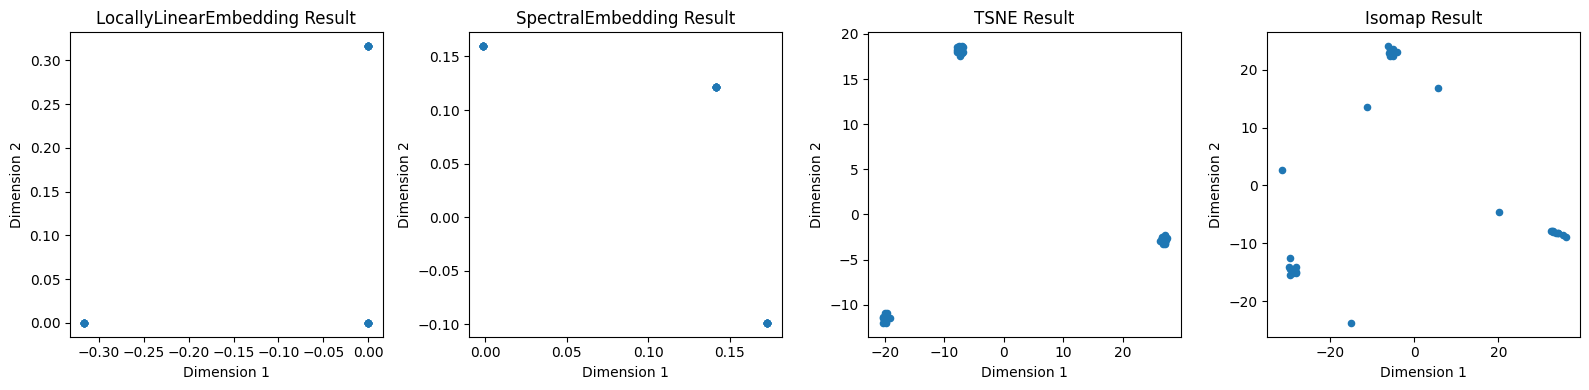

In [66]:
from sklearn.manifold import TSNE, Isomap, SpectralEmbedding, LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2).fit_transform(df.T)
spectral = SpectralEmbedding(n_components=2).fit_transform(df.T)
tsne = TSNE(n_components=2, perplexity=10, n_iter=500).fit_transform(df.T)
isomap = Isomap(n_components=2, n_neighbors=9).fit_transform(df.T)

results = {'LocallyLinearEmbedding': lle, 
            'SpectralEmbedding': spectral, 
            'TSNE': tsne, 
            'Isomap': isomap}

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
for i, (name, result) in enumerate(results.items()):
    axes[i].scatter(result[:, 0], result[:, 1], s=20)
    axes[i].set_title(f'{name} Result')
    axes[i].set_xlabel('Dimension 1')
    axes[i].set_ylabel('Dimension 2')

plt.tight_layout()
plt.show()

## Clustering
Scikit-learn has an excellent quick reference on clustering [here](https://scikit-learn.org/stable/modules/clustering.html).

### Agglomerative Hierarchical Clustering 
"Bottom-up" approach: each observation starts in its own cluster. Clusters are merged as one moves up the hierachy

Cluster labels for the features: [0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1]


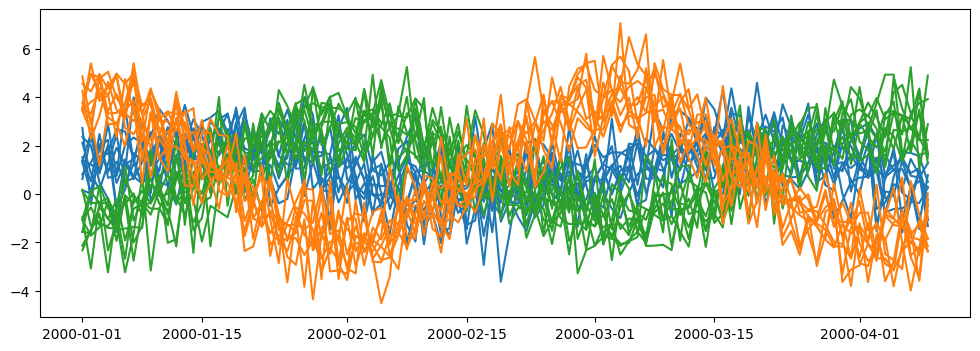

In [41]:
n_clusters = 3
clustering_model = AgglomerativeClustering(n_clusters=n_clusters)
labels = clustering_model.fit_predict(df.T)

print(f"Cluster labels for the features: {labels}")
for i, label in enumerate(labels):
    plt.plot(date_index, data[f'x{i}'], c=colors[label])

Linkage Methods:
- Single Linkage: Measures the minimum distance between elements of two clusters.
- Complete Linkage: Measures the maximum distance between elements of two clusters.
- Average Linkage: Uses the average distance between all pairs of elements from two clusters.
- Ward: Minimizes the total within-cluster variance.

[Scipy's dendrogram documenation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram)

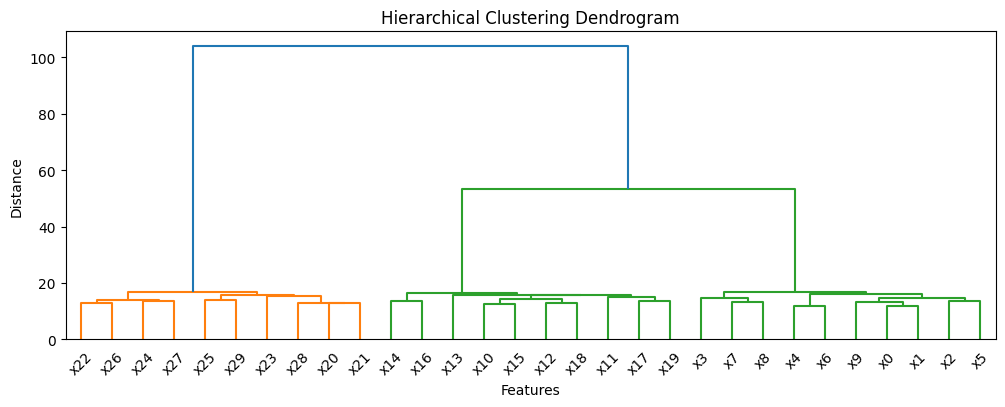

In [42]:
Z = linkage(df.T.values, method='ward')
dendrogram(Z, labels=df.columns)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

## Unsupervised nearest neighbors
Unsupervised nearest neighbors is the foundation of many other learning methods, notably manifold learning and spectral clustering [(scikit-learn)](https://scikit-learn.org/stable/modules/neighbors.html).

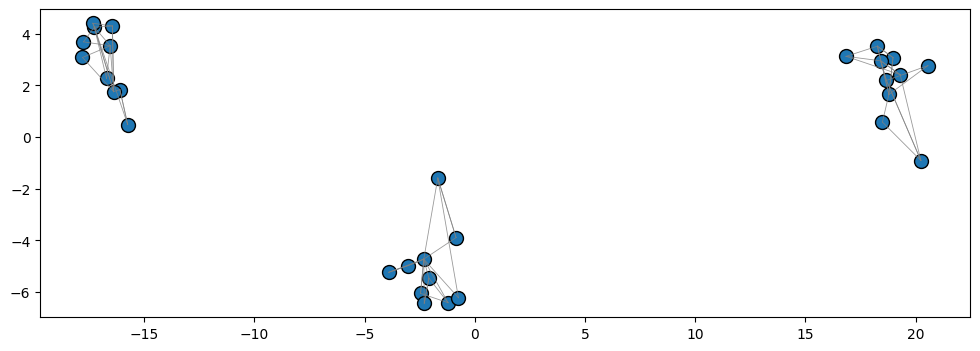

In [43]:
neighbors = NearestNeighbors(n_neighbors=n_clusters)
neighbors.fit(df.T)
distances, indices = neighbors.kneighbors(df.T)

pca = PCA(n_components=2)
data_2d = pca.fit_transform(df.T)

plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], s=100, color='tab:blue', edgecolor='k')

# Draw lines to nearest neighbors
for i in range(data_2d.shape[0]):
    for neighbor in indices[i]:
        plt.plot([data_2d[i, 0], data_2d[neighbor, 0]],
                 [data_2d[i, 1], data_2d[neighbor, 1]],
                 color='gray', linewidth=0.6, alpha=0.8)


Cluster labels for the features: [0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1]


c:\USERS\JBARKER\ONEDRIVE - GENERAC POWER SYSTEMS, INC\DOCUMENTS\CODE\TORCH\Lib\site-packages\sklearn\cluster\_agglomerative.py:323: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


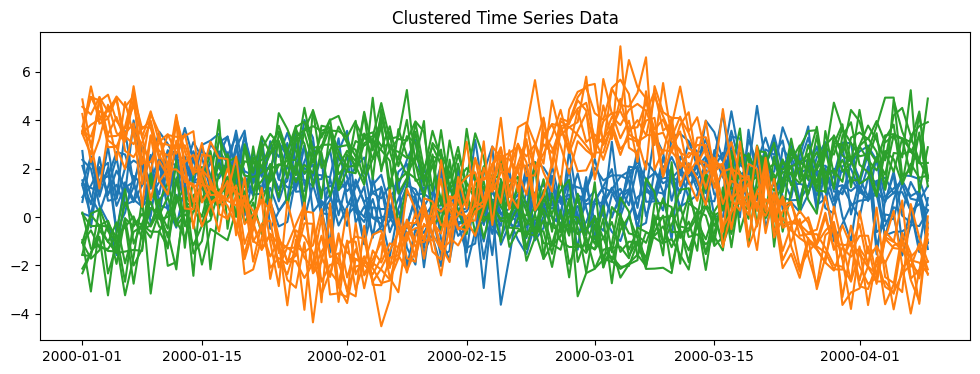

In [44]:
connectivity = kneighbors_graph(df.T, n_neighbors=n_clusters)

clustering_model = AgglomerativeClustering(
    n_clusters=n_clusters,
    connectivity=connectivity,
)

# Fit the clustering model and predict cluster labels
labels = clustering_model.fit_predict(df.T)
print(f"\nCluster labels for the features: {labels}")

# Plot each column in its respective cluster color
for i, label in enumerate(labels):
    plt.plot(df.index, df.iloc[:, i], color=colors[label])

plt.title('Clustered Time Series Data')
plt.show()

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
DBSCAN determines the number of clusters based on the density of the data points, controlled by two main parameters:
- `eps`: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
- `min_samples`: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.

Cluster labels for the features: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


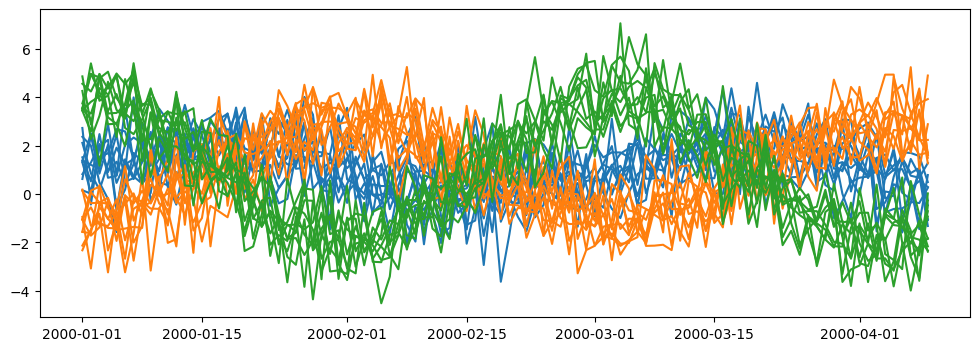

In [45]:
db = DBSCAN(eps=15, min_samples=3).fit(df.T)
labels = db.labels_

print(f"Cluster labels for the features: {labels}")
for i, label in enumerate(labels):
    plt.plot(date_index, data[f'x{i}'], c=colors[label])

### K-Means
Steps:
1. Init $K$ cluster centroids randomly
2. Assign each point to the nearest centroid
3. Recalc centroids to the mean of the assigned points
4. Repeat 2 & 3 until the centroids stop changing 

Cluster labels for the features: [2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


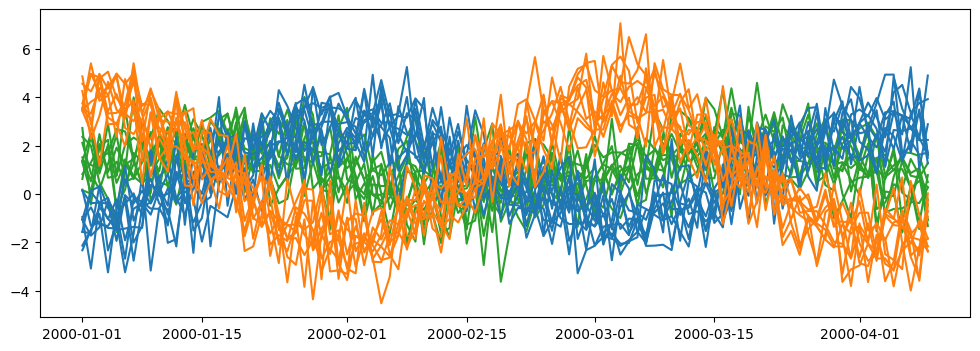

In [46]:
kmeans = KMeans(n_clusters=n_clusters).fit(df.T)
labels = kmeans.labels_

print(f"Cluster labels for the features: {labels}")
for i, label in enumerate(labels):
    plt.plot(date_index, data[f'x{i}'], c=colors[label])

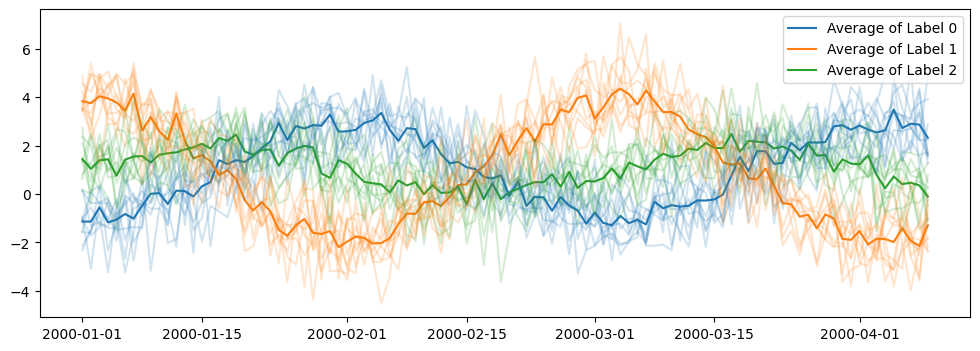

In [47]:
grouped_means = df.groupby(labels, axis=1).mean()
for label in grouped_means.columns:
    plt.plot(grouped_means.index, grouped_means[label], c=colors[label], label=f'Average of Label {label}')
plt.legend()

for i, label in enumerate(labels):
    plt.plot(date_index, data[f'x{i}'], c=colors[label], alpha=0.2)

### Gaussian Mixture Models (GMM)
GMMs are a probabilistic clustering method that assumes data is generated from a mixture of several Gaussian distributions with unknown parameters.

`covariance_type`: Type of covariance parameters. Options include:
- `'full'`: Each component has its own general covariance matrix.
- `'tied'`: All components share the same covariance matrix.
- `'diag'`: Each component has its own diagonal covariance matrix.
- `'spherical'`: Each component has its own single variance.

Cluster labels for the features: [2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


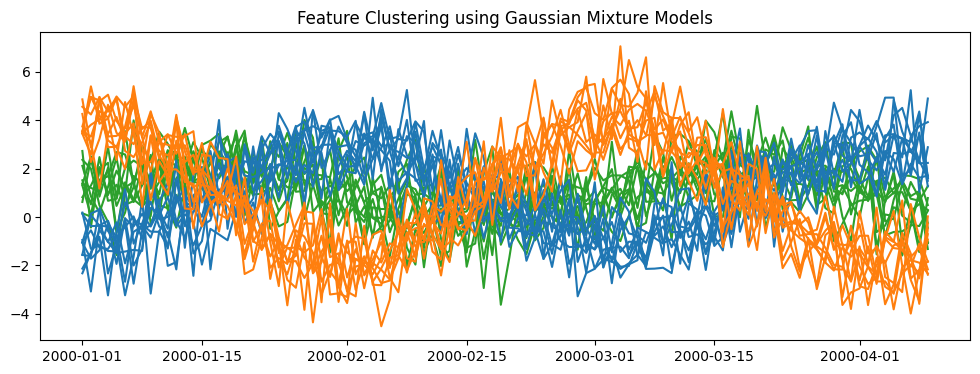

In [50]:
from sklearn.mixture import GaussianMixture

# Create and fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(df.T)

# Predict the cluster labels for the features
labels = gmm.predict(df.T)
print(f"Cluster labels for the features: {labels}")

# Plot the time series of each feature colored by their cluster label
for i, label in enumerate(labels):
    feature_name = df.columns[i]
    plt.plot(df.index, df[feature_name], color=colors[label])
plt.title('Feature Clustering using Gaussian Mixture Models')
plt.show()

## Method Comparison

Three widely used internal evaluation metrics are:
- Silhouette Score: measures how similar each data point is to its own cluster compared to other clusters.
- Calinski-Harabasz Score: evaluates the ratio of between-cluster variance to within-cluster variance. 
- Davies-Bouldin Score: measures the average similarity ratio of each cluster with its most similar cluster. 


<br>

|Metric             |	Range           |	Higher is Better    |	Pros    |	Cons |
| -------- | ------- | -------- | ------- | -------- |
|Silhouette Score	|   -1 to +1	    |   Yes	                |Intuitive, versatile, provides individual insights	| Computationally intensive, sensitive to cluster shape|
|Calinski-Harabasz	|   0 to +$\infty$        |   Yes                 |Efficient, handles multiple clusters well, encourages dense separation	| Assumes spherical clusters, sensitive to scale|
|Davies-Bouldin	    |   0 to +$\infty$    |	No	                |Easy to interpret, computationally efficient   |   Sensitive to noise/outliers, assumes spherical clusters|

,Silhouette Score,Calinski-Harabasz Index,Davies-Bouldin Index
KMeans,0.709535,1686.171203,0.426524
AgglomerativeClustering,0.709535,1686.171203,0.426524
DBSCAN,0.642863,807.811531,1.645254
GaussianMixture,0.709535,1686.171203,0.426524


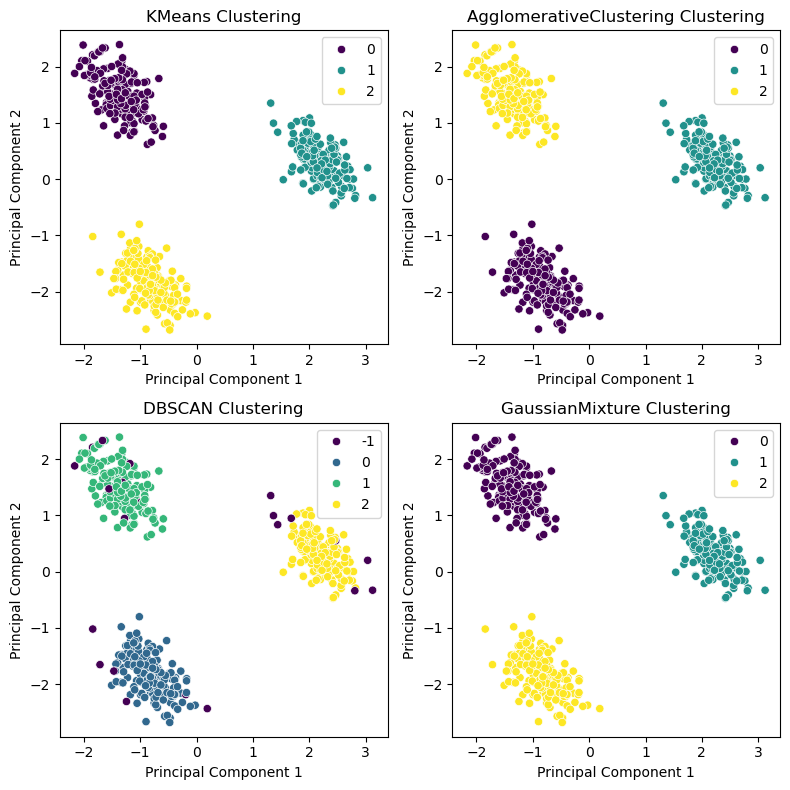

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

def evaluate_clustering(X_scaled, labels):
    metrics = {
        'Silhouette Score': silhouette_score(X_scaled, labels),
        'Calinski-Harabasz Index': calinski_harabasz_score(X_scaled, labels),
        'Davies-Bouldin Index': davies_bouldin_score(X_scaled, labels),
    }
    return metrics

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs = axs.flatten()

from sklearn.datasets import make_blobs
X_synthetic, _ = make_blobs(n_samples=500, centers=3, n_features=5, random_state=42)
df = pd.DataFrame(X_synthetic, columns=[f'Feature_{i}' for i in range(1, 6)])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

algorithms = {
    'KMeans': KMeans(n_clusters=3, random_state=42),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=3),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'GaussianMixture': GaussianMixture(n_components=3, random_state=42),
}

results = {}

for i, (name, algorithm) in enumerate(algorithms.items()):
    labels = algorithm.fit_predict(X_scaled)
    metrics = evaluate_clustering(X_scaled, labels)
    results[name] = metrics

    sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=labels, palette='viridis', legend='full', ax=axs[i])
    axs[i].set_title(f'{name} Clustering')
    axs[i].set_xlabel('Principal Component 1')
    axs[i].set_ylabel('Principal Component 2')

plt.tight_layout()
metrics_df = pd.DataFrame(results).T
display(metrics_df)

## References:
- [A Survey on Dimensionality Reduction Techniques for Time-Series Data](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=10107391)
- [Comparing different clustering algorithms on toy datasets (Sklearn)](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py)